In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib  # This should work perfectly now!

# Set visual style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)

# Load the data
stock_file = '../data/META.csv'
df = pd.read_csv(stock_file)

# Convert Date to DateTime and set as Index (Crucial for Time Series)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
                Close       High        Low       Open     Volume
Date                                                             
2012-05-18  37.995762  44.724282  37.767172  41.792356  573576400
2012-05-21  33.821495  36.435382  32.797807  36.306177  168192700
2012-05-22  30.810066  33.384198  30.750434  32.410203  101786600
2012-05-23  31.803938  32.300874  31.167860  31.177799   73600000
2012-05-24  32.827625  33.006523  31.575347  32.748117   50237200


In [2]:
# 1. Simple Moving Average (SMA)
# SMA 20: Short-term trend
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
# SMA 50: Long-term trend
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# 2. Relative Strength Index (RSI)
# Measures speed/change of price movements (Overbought > 70, Oversold < 30)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# 3. MACD (Moving Average Convergence Divergence)
# Shows the relationship between two moving averages of a security’s price
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Inspect the new columns
print(df[['Close', 'SMA_20', 'SMA_50', 'RSI', 'MACD']].tail())

                 Close      SMA_20      SMA_50        RSI      MACD
Date                                                               
2023-12-22  351.224823  332.302945  323.317843  67.333885  6.945367
2023-12-26  352.655975  333.303278  324.115724  68.187000  7.436800
2023-12-27  355.637543  334.239505  324.844828  69.947874  7.974921
2023-12-28  356.124634  335.537503  325.527023  70.237702  8.344500
2023-12-29  351.791290  336.869788  326.262290  64.296803  8.193282


/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


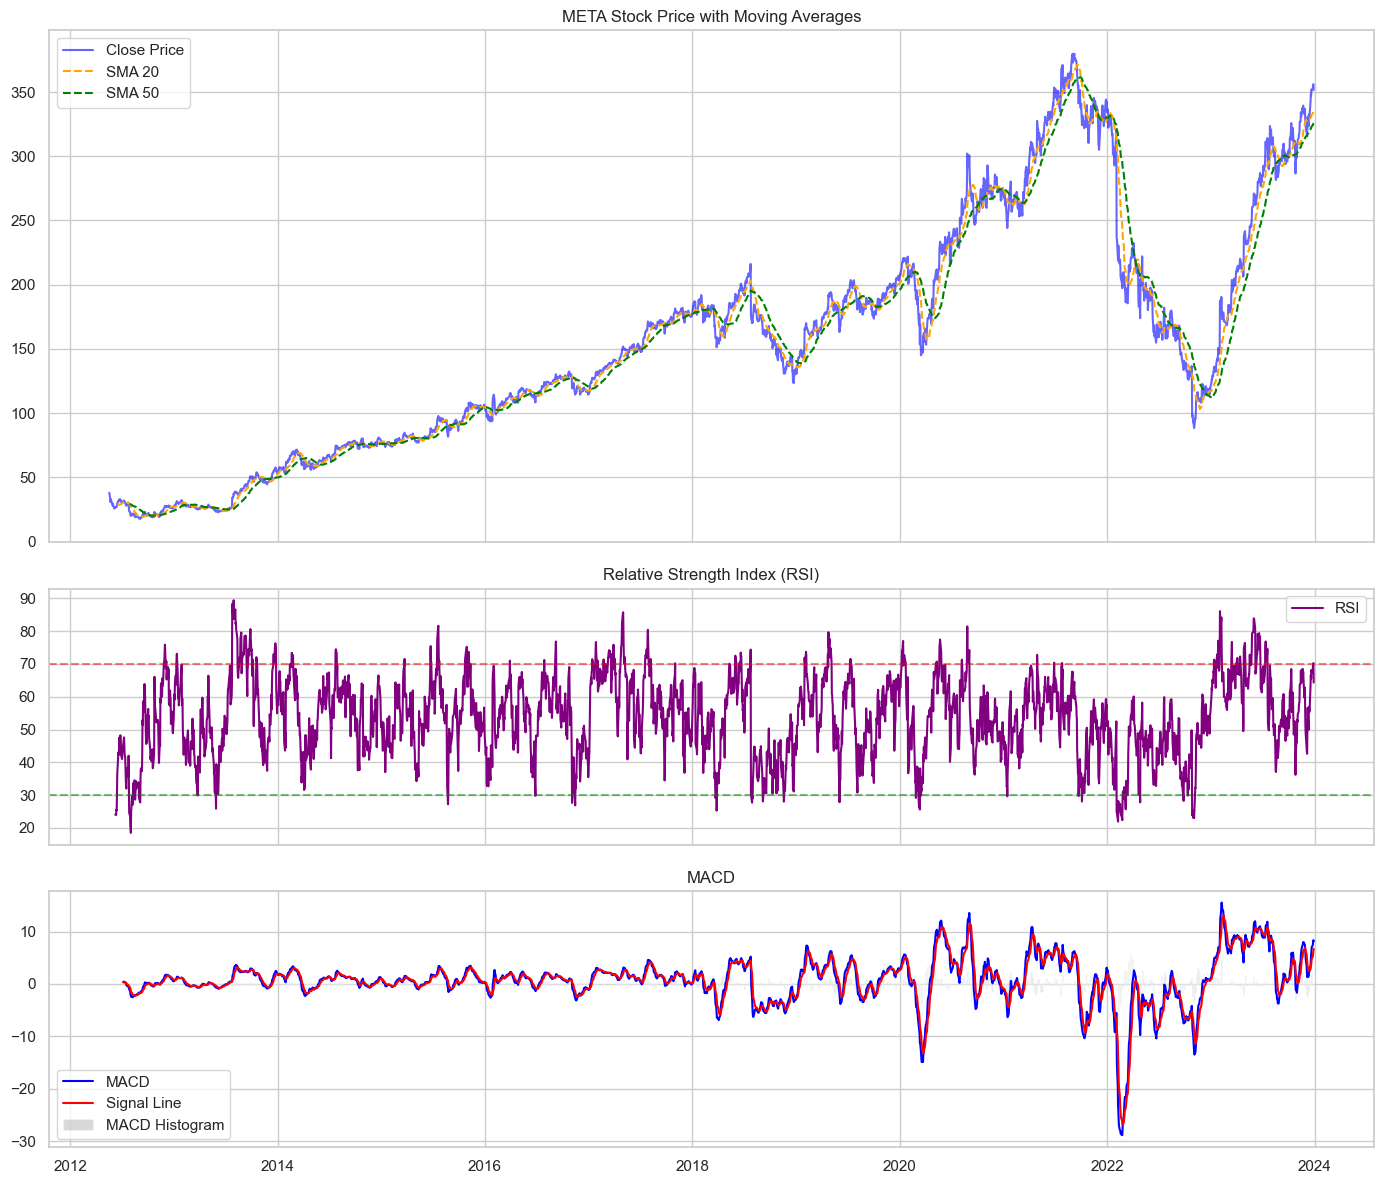

In [3]:
# Create a figure with 3 subplots (Price, RSI, MACD)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True, gridspec_kw={'height_ratios': [2, 1, 1]})

# Plot 1: Price & SMAs
ax1.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.6)
ax1.plot(df.index, df['SMA_20'], label='SMA 20', color='orange', linestyle='--')
ax1.plot(df.index, df['SMA_50'], label='SMA 50', color='green', linestyle='--')
ax1.set_title('META Stock Price with Moving Averages')
ax1.legend()

# Plot 2: RSI
ax2.plot(df.index, df['RSI'], color='purple', label='RSI')
ax2.axhline(70, color='red', linestyle='--', alpha=0.5) # Overbought line
ax2.axhline(30, color='green', linestyle='--', alpha=0.5) # Oversold line
ax2.set_title('Relative Strength Index (RSI)')
ax2.legend()

# Plot 3: MACD
ax3.plot(df.index, df['MACD'], label='MACD', color='blue')
ax3.plot(df.index, df['MACD_signal'], label='Signal Line', color='red')
ax3.bar(df.index, df['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.3)
ax3.set_title('MACD')
ax3.legend()

plt.tight_layout()
plt.show()

                 Close  Daily_Return  Cumulative_Return  Volatility
Date                                                               
2023-12-22  351.224823     -0.001977           9.243789    0.016090
2023-12-26  352.655975      0.004075           9.281456    0.015809
2023-12-27  355.637543      0.008455           9.359927    0.015697
2023-12-28  356.124634      0.001370           9.372746    0.014758
2023-12-29  351.791290     -0.012168           9.258698    0.014566


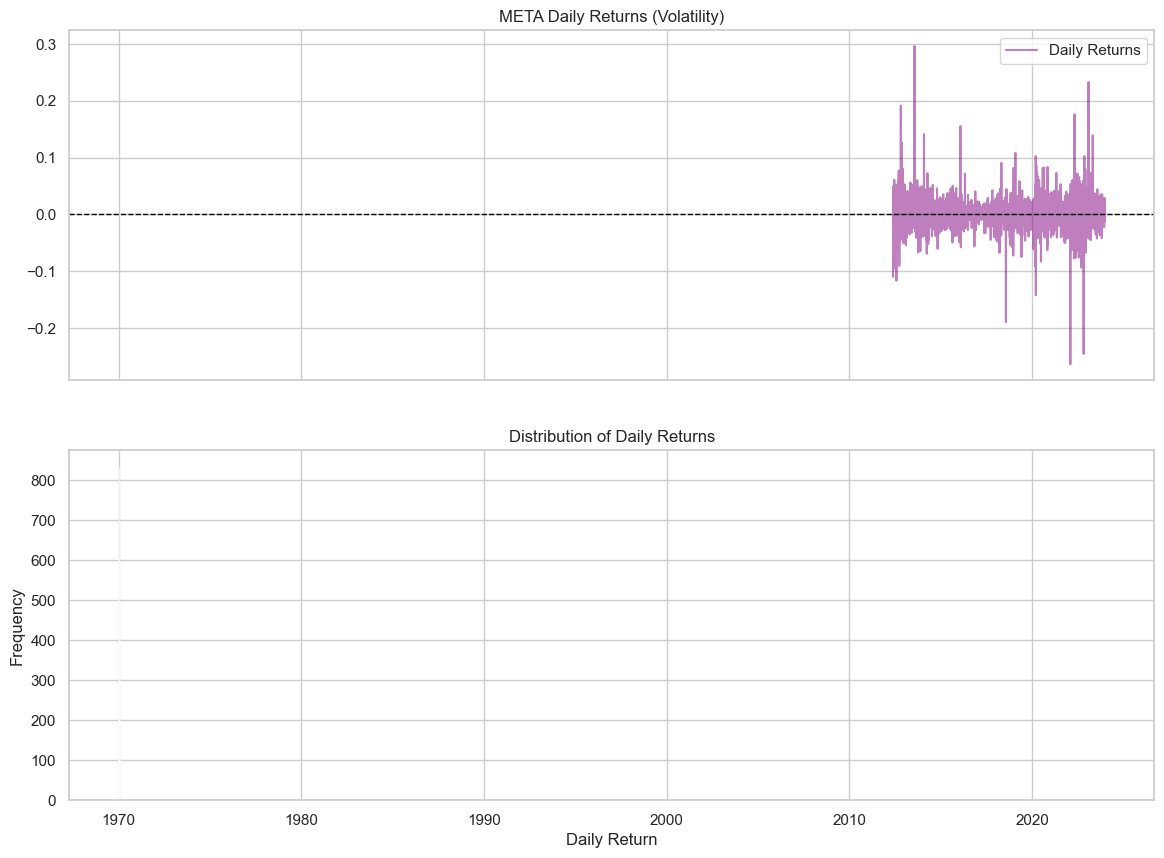

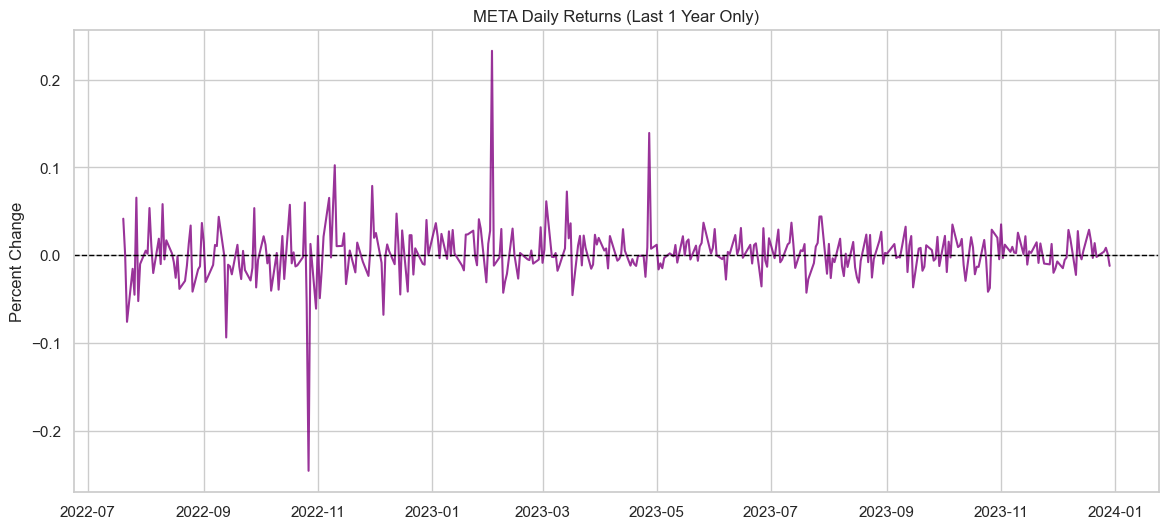

In [4]:
# --- 1. Daily Returns ---
# How much did the price change percentage-wise?
df['Daily_Return'] = df['Close'].pct_change()

# --- 2. Cumulative Returns ---
# If you invested $1 on Day 1, how much is it worth now?
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

# --- 3. Volatility (Risk) ---
# 20-day rolling standard deviation of returns
# High volatility = High Risk
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()

# Inspect the data
print(df[['Close', 'Daily_Return', 'Cumulative_Return', 'Volatility']].tail())

# --- Visualization of Metrics ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot Daily Returns (Noise)
ax1.plot(df.index, df['Daily_Return'], color='purple', alpha=0.5, label='Daily Returns')
ax1.axhline(0, color='black', linestyle='--', linewidth=1)
ax1.set_title('META Daily Returns (Volatility)')
ax1.legend()

# Plot Histogram of Returns (Bell Curve)
# This shows if returns are "normal" or skewed
ax2.hist(df['Daily_Return'].dropna(), bins=50, color='blue', alpha=0.7)
ax2.set_title('Distribution of Daily Returns')
ax2.set_xlabel('Daily Return')
ax2.set_ylabel('Frequency')

last_year = df.iloc[-365:]
plt.figure(figsize=(14, 6))
plt.plot(last_year.index, last_year['Daily_Return'], color='purple', alpha=0.8, linewidth=1.5)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('META Daily Returns (Last 1 Year Only)')
plt.ylabel('Percent Change')
plt.show()